In [88]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

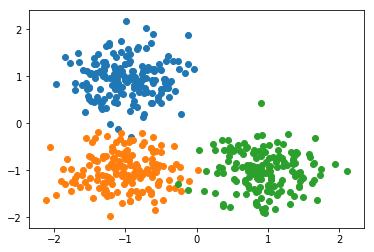

In [89]:
n_pts = 500
np.random.seed(0)
centers = [[-1,1], [-1,-1], [1,-1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()
y_cat = to_categorical(y, 3)
#print(y)
#print(y_cat)


In [90]:
np.random.seed(0)
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
adam = Adam(lr=0.01)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y_cat, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 1.9601 - acc: 0.0020
Epoch 2/100
500/500 [==============================] - 0s 39us/step - loss: 1.7328 - acc: 0.0060
Epoch 3/100
500/500 [==============================] - 0s 39us/step - loss: 1.5286 - acc: 0.0120
Epoch 4/100
500/500 [==============================] - 0s 42us/step - loss: 1.3511 - acc: 0.0980
Epoch 5/100
500/500 [==============================] - 0s 39us/step - loss: 1.1932 - acc: 0.2600
Epoch 6/100
500/500 [==============================] - 0s 44us/step - loss: 1.0544 - acc: 0.3680
Epoch 7/100
500/500 [==============================] - 0s 46us/step - loss: 0.9364 - acc: 0.4460
Epoch 8/100
500/500 [==============================] - 0s 39us/step - loss: 0.8349 - acc: 0.5460
Epoch 9/100
500/500 [==============================] - 0s 50us/step - loss: 0.7470 - acc: 0.7860
Epoch 10/100
500/500 [==============================] - 0s 39us/step - loss: 0.6729 - acc: 0.9020
Epoch 11/100
500/500 [========

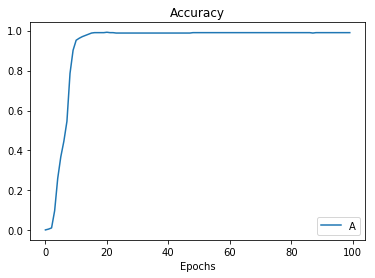

In [91]:
plt.plot(h.history['acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend('Accuracy')
plt.show()

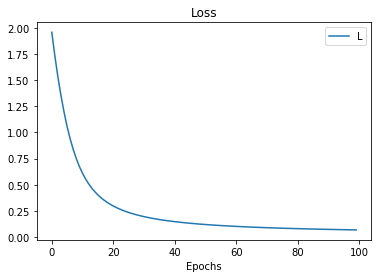

In [92]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend('Loss')
plt.show()

In [93]:
def plot_multiclass_decision_boundary(X, y , model):
    x_span = np.linspace(min(X[:,0] - 1 ), max(X[:,0] + 1))
    y_span = np.linspace(min(X[:,1] - 1), max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    #print(grid)
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
   
    

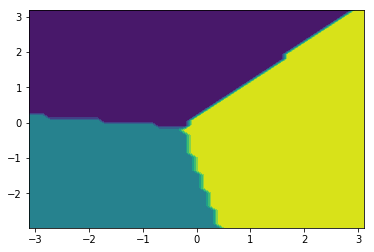

In [94]:
plot_multiclass_decision_boundary(X, y, model)
plt.show()

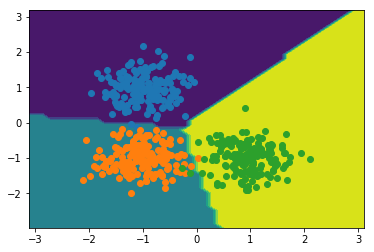

In [95]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

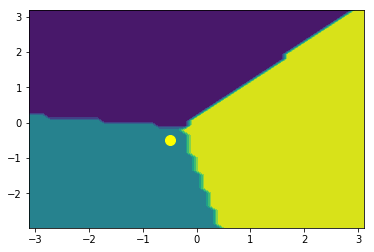

Prediction is:  [1]


In [97]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
x = -0.5
y = -0.5
prediction = model.predict_classes(np.array([[x ,y]]))
plt.plot([x], [y], marker='o', markersize='10', color='yellow')
plt.show()
print("Prediction is: ", prediction)